## Projeto 2

### Preparação dos dados

In [34]:
# comando usado para resolver problema do proximo bloco (caso ocorra)
# !pip install -U -q xlrd

In [35]:
import pandas as pd

df = pd.read_excel('Sample - Superstore.xls')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [36]:
list(df.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [37]:
df[df['Category'] == 'Office Supplies'][['City']].describe()['City']['top']

'New York City'

### Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico de barras.

<BarContainer object of 1334 artists>

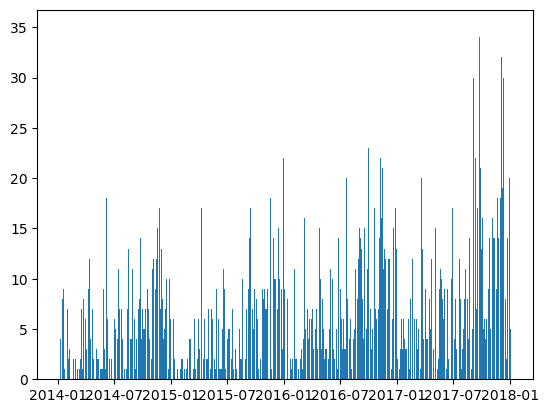

In [38]:
import matplotlib.pyplot as plt
import numpy as np

sales_by_date = df[['Ship Date']].groupby('Ship Date').value_counts()
x = sales_by_date.keys()
y = sales_by_date.to_list()

plt.bar(x, y)

### Qual o Total de Vendas por Estado? Demonstre o resultado através de um gráfico de barras.

In [39]:
df3 = df[['State']].groupby('State').value_counts()
states = df3.keys()
sales = [val for val in df3]
sales_state = pd.DataFrame({'State': states, 'Sales': sales})
x = []
y = []
inc = lambda val: x.append(val[0]) and y.append(val[1])
map(inc, sales_state.values)
y

[]

### Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [40]:
sales_state.sort_values('Sales', ascending=False).head(10)

,State,Sales
3,California,2001
30,New York,1128
41,Texas,985
36,Pennsylvania,587
45,Washington,506
11,Illinois,492
33,Ohio,469
8,Florida,383
20,Michigan,255
31,North Carolina,249


### Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

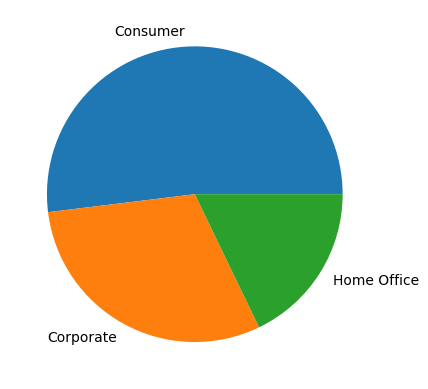

In [41]:
values = df[['Segment']].value_counts()
fatias = values.values
labels = [x[0] for x in values.keys()]
plt.pie(fatias, labels=labels)
plt.show()

### Qual o Total de Vendas Por Segmento e Por Ano?

In [46]:
df4 = df[['Order ID', 'Segment']]
df4['Ano'] = df4['Order ID'].str.split('-').str[1]
df4['Ocorrências'] = np.array([1 for _ in range(len(df4))])
df4[['Ano', 'Segment', 'Ocorrências']].groupby(['Ano', 'Segment']).sum()
display(df4)

/tmp/ipykernel_10600/1749985470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Ano'] = df4['Order ID'].str.split('-').str[1]
/tmp/ipykernel_10600/1749985470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Ocorrências'] = np.array([1 for _ in range(len(df4))])


,Order ID,Segment,Ano,Ocorrências
0,CA-2016-152156,Consumer,2016,1
1,CA-2016-152156,Consumer,2016,1
2,CA-2016-138688,Corporate,2016,1
3,US-2015-108966,Consumer,2015,1
4,US-2015-108966,Consumer,2015,1
...,...,...,...,...
9989,CA-2014-110422,Consumer,2014,1
9990,CA-2017-121258,Consumer,2017,1
9991,CA-2017-121258,Consumer,2017,1
9992,CA-2017-121258,Consumer,2017,1


### Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:
### Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
### Se o Valor_Venda for menor que 1000 recebe 10% de desconto.
### Quantas Vendas Receberiam 15% de Desconto?

### Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?
### Demonstre tudo através de um único gráfico.